## Use Code Execution in Conversation


Writing and executing code is necessary for many tasks such as data analysis, machine learning, and mathematical modeling. In AutoGen, coding can be a conversation between a code writer agent and a code executor agent, mirroring the interaction between a programmer and a code interpreter.

In [4]:
from autogen import config_list_from_json

myModelname="gpt-35-turbo" #your model Name

#Read config File AOAI_CONFIG_LIST.json
config_list = config_list_from_json(
    env_or_file="/Users/rakeshchoudhury/Git/AzureAILab/AutoGenIntroLab/AOAI_CONFIG_LIST.json",
    filter_dict={"model": myModelname}
    )

# LLM config file for myModelname (your model Name)

llm_myModelName_config={
        "timeout": 600,
        "seed": 42,
        "config_list": config_list,
    }

The code writer agent can be powered by an LLM such as GPT-4 with code-writing capability. And the code executor agent is powered by a code executor.

The following is an agent with a code writer role specified using system_message. The system message contains important instruction on how to use the code executor in the code executor agent.

In [5]:
from autogen import ConversableAgent
# The code writer agent's system message is to instruct the LLM on how to use
# the code executor in the code executor agent.
code_writer_system_message = """You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feedback or perform any other action beyond executing the code you suggest. The user can't modify your code. So do not suggest incomplete code which requires users to modify. Don't use a code block if it's not intended to be executed by the user.
If you want the user to save the code in a file before executing it, put # filename: <filename> inside the code block as the first line. Don't include multiple code blocks in one response. Do not ask users to copy and paste the result. Instead, use 'print' function for the output when relevant. Check the execution result returned by the user.
If the result indicates there is an error, fix the error and output the code again. Suggest the full code instead of partial code or code changes. If the error can't be fixed or if the task is not solved even after the code is executed successfully, analyze the problem, revisit your assumption, collect additional info you need, and think of a different approach to try.
When you find an answer, verify the answer carefully. Include verifiable evidence in your response if possible.
Reply 'TERMINATE' in the end when everything is done.
"""

code_writer_agent = ConversableAgent(
    "code_writer_agent",
    system_message=code_writer_system_message,
    llm_config=llm_myModelName_config,
    code_execution_config=False,  # Turn off code execution for this agent. This agend write the code but it dosen't execute the code.!!!!!
)

In [6]:
import tempfile

from autogen import ConversableAgent
from autogen.coding import LocalCommandLineCodeExecutor

# Create a temporary directory to store the code files.
temp_dir = tempfile.TemporaryDirectory()

# Create a local command line code executor.
executor = LocalCommandLineCodeExecutor(
    timeout=10,  # Timeout for each code execution in seconds.
    work_dir=temp_dir.name,  # Use the temporary directory to store the code files.
)

# Create an agent with code executor configuration.
code_executor_agent = ConversableAgent(
    "code_executor_agent",
    llm_config=False,  # Turn off LLM for this agent.
    code_execution_config={"executor": executor},  # Use the local command line code executor.
    human_input_mode="ALWAYS",  # Always take human input for this agent for safety.
)

Play: 

During the previous chat session, human input was requested each time the code executor agent responded to ensure that the code was safe to execute.

if the code propousal is good just press enter. After the output is print, enter Exit.

In [7]:

chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    #message="Write Python function  code to calculate the 14th Fibonacci number",
    message="Write Python function  code to calculate the 2 plus 2",
)

code_executor_agent (to code_writer_agent):

Write Python function  code to calculate the 2 plus 2

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
code_writer_agent (to code_executor_agent):

```python
def add_two_and_two():
    result = 2 + 2
    return result

print(add_two_and_two())
```

--------------------------------------------------------------------------------

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
code_executor_agent (to code_writer_agent):

exitcode: 0 (execution succeeded)
Code output: 4


--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
code_writer_agent (to code_executor_agent):

The code executed successfully and the result is 4, which is the correct answer for 2 plus 2. This confirms that the function is working as expected.

TERMINATE

-------------------

Now we can try a more complex example that involves querying the web. Let’s say we want to get the the stock price gains year-to-date for Tesla and Meta (formerly Facebook). We can also use the two agents with several iterations of conversation.

In [8]:
%pip install yfinance
%pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.3/315.3 kB 773.5 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 1.3 MB/s eta 0:00:00a 0:00:010m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.5-py3-none-any.whl.metadata (4.7 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 1.7 MB/s eta 0:00:0000:01
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 1.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 2.7 MB/s eta

Play...

Accept the code propusal just click enter.
Aftyer the file is save, enter Exit.

In [9]:
import datetime

today = datetime.datetime.now().strftime("%Y-%m-%d")
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=f"Today is {today}. Write Python function code to plot TSLA's and META's "
    "stock price gains YTD, and save the plot to a file named 'stock_gains.png'."
    " Don't create a phyton code file, execute the code in the phyton enviroment.",
)

code_executor_agent (to code_writer_agent):

Today is 2024-04-20. Write Python function code to plot TSLA's and META's stock price gains YTD, and save the plot to a file named 'stock_gains.png'. Don't create a phyton code file, execute the code in the phyton enviroment.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
code_writer_agent (to code_executor_agent):

```python
# filename: stock_gains_plot.py
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def plot_stock_gains():
    start_date = '2024-01-01'
    end_date = '2024-04-20'
    
    tsla = yf.download('TSLA', start=start_date, end=end_date)['Adj Close']
    meta = yf.download('META', start=start_date, end=end_date)['Adj Close']
    
    tsla_gain = (tsla[-1] - tsla[0]) / tsla[0] * 100
    meta_gain = (meta[-1] - meta[0]) / meta[0] * 100
    
    plt.figure(figsize=(10, 6))
    plt.plot(tsla.index, tsla, label='TSLA')
    plt.plot(meta.index

Finally, shows the Graph

/var/folders/2y/p533j4713tz5lt3whpbdv_km0000gn/T/tmpp_sn_z5l/stock_gains.png


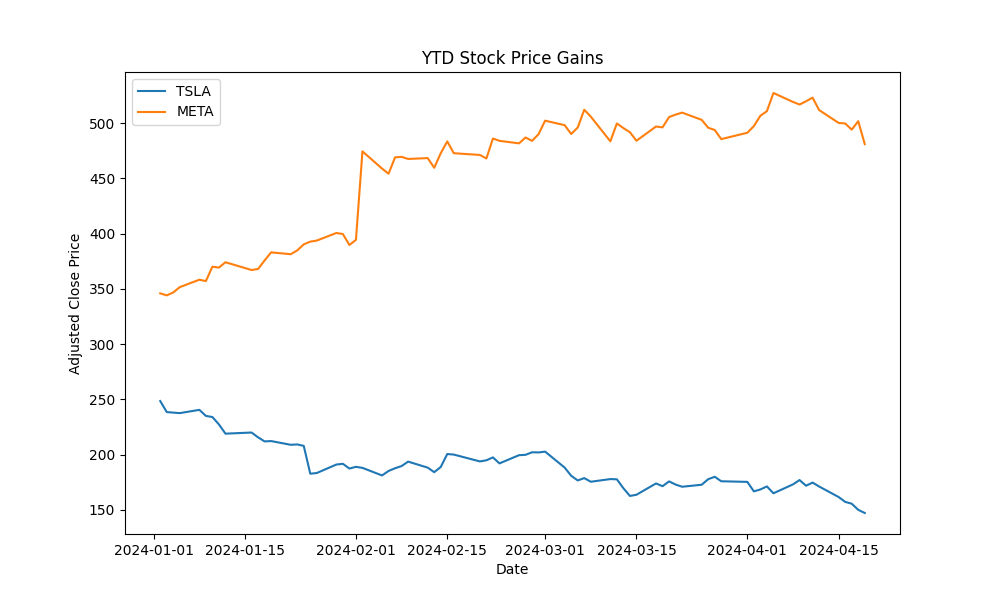

In [10]:
import os
from IPython.display import Image
fileName=os.path.join(temp_dir.name, "stock_gains.png")
print(fileName)
Image(fileName)